# Teoría de los Circuitos 2   <img src="./logo_UTN.svg" align="right" width="150" /> 

#### Dr. Mariano Llamedo Soria


# Primeros pasos

### Preparación del entorno de trabajo


Se sugiere tener listo durante la primer semana el ambiente de trabajo:

* [Spyder](https://www.spyder-ide.org/)
* [Jupyter Notebook](https://jupyter.org/install)
* [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html)
* El gestor de repositorios [Git](https://git-scm.com/downloads)
* Una [cuenta en Github](https://github.com/), donde crearás una carpeta/repositorio a través del cual presentarás tus trabajos.

Siguiendo los siguientes pasos podrás tener todo listo:

#### Paso 1: Instalación de Python

1. Instalamos Python, **asegurando que tengas una versión 3.8 o superior**, y el gestor de paquetes PIP

```bash
$ sudo apt install python3 python3-pip
$ python3 -V
Python 3.10.4
```


2. Ahora ya podemos usar el gestor PIP. Instalará en tu entorno de usuario todos los módulos e IDE necesaria para que trabajes en PDS.

```bash
$ pip3 install --user --upgrade pip scipy numpy jupyter matplotlib sympy schemdraw spyder pyfda
```
3. Si todo termina bien, ya tenés casi todo el ambiente de trabajo. Cuando quieras actualizar cualquier paquete, por lo general el Spyder IDE es un proyecto muy activo que saca varias actualizaciones por mes, deberías ejecutar:

```bash
$ pip3 install --user --upgrade pip spyder # ... y todos los demás paquetes que quieras actualizar
```


#### Paso 2: Instalación de GIT y repositorios

1. Instalamos GIT

```bash
$ sudo apt install git
```

2. Ahora ya podemos clonar los repositorios de la materia:

```bash
$ cd tu_directorio_de_trabajo
$ git clone https://github.com/marianux/tc2.git
```

3. Ahora si ya podés revisar los siguientes scripts para familiarizarte con Python:

    a. Abrí Spyder. Si usaste Matlab, verás que es un clon. Situá tu directorio de trabajo en *tu_directorio_de_trabajo*.
     
    b. Abrí los siguientes scripts de ejemplo y probá ejecutarlos:
     
        * demo_seg_orden1.py
        * demo_seg_orden2.py
    
    c. Ejecutalos (Run - F5). Si sos usuario de Matlab, [este documento](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) te va a servir seguramente.
    
    d. Obtendrás como resultado unas figuras con la respuesta en frecuencia de un sistema de este tipo:

\begin{equation}
H(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

con parámetros $\omega_0=1$ rad/s y $Q=1$

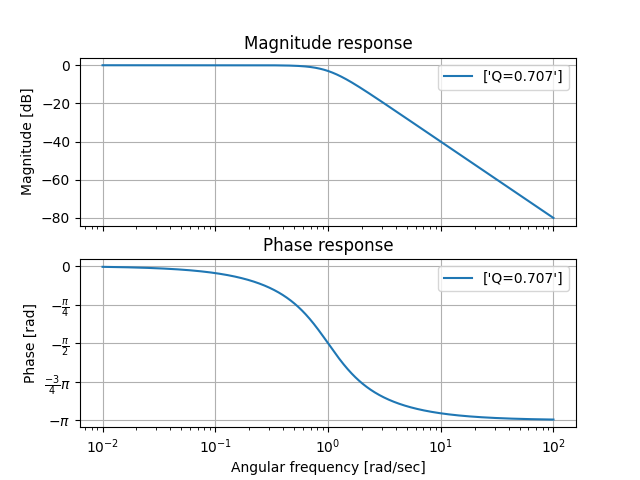

Esto que ves arriba, es una imagen PNG incrustada en el notebook. Como esto es un notebook no es la idea incrustar imágenes como lo podés hacer en cualquier editor de documentos, sino que aprovechamos una de las principales ventajas que tiene y ejecutamos el mismo código aquí dentro, transcribiendo el contenido de *demo_seg_orden1.py*:


(3,
 <AxesSubplot:title={'center':'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

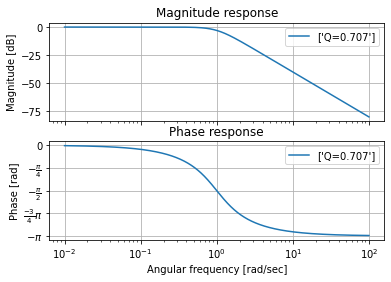

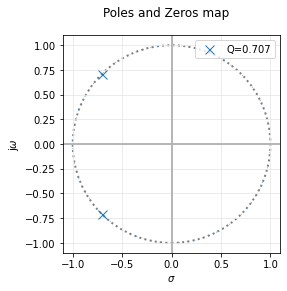

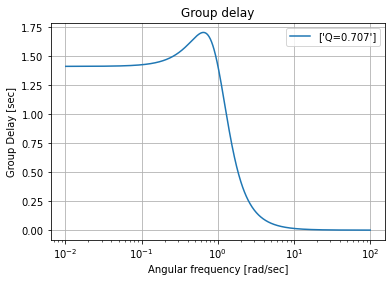

In [1]:
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


w0 = 1
qq = np.sqrt(2)/2

my_tf = TransferFunction( [w0**2], [1, w0/qq, w0**2] )

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))


Como se puede ver, los tamaños por defecto son **demasiado pequeños**, deberías ampliarlos un poco para que se vean más adecuados al navegador. Te comparto una receta, y de paso, podés jugar con los parámetros y probar el segundo ejemplo sin demasiado esfuerzo:

In [2]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías


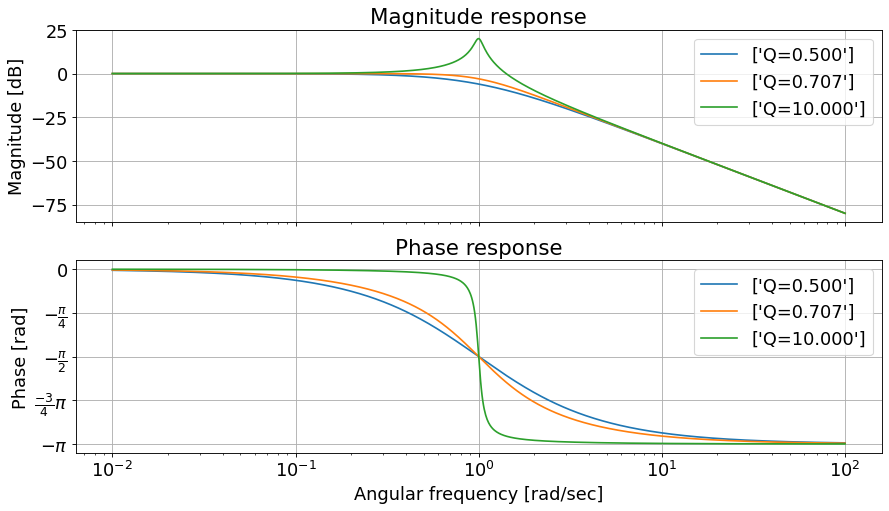

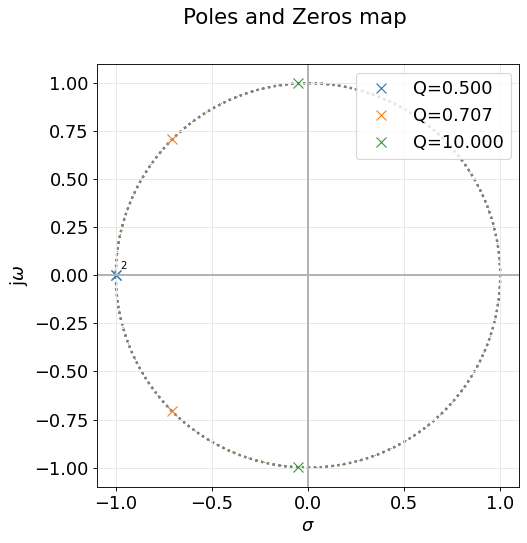

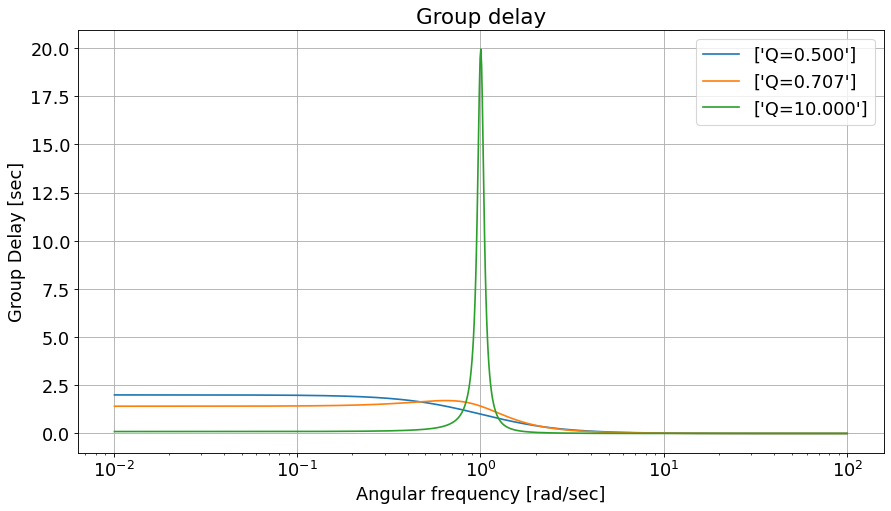

In [3]:


qq_param = [ 0.5, np.sqrt(2)/2, 10]

for qq in range(len(qq_param)):
    
    my_tf = TransferFunction( [w0**2], [1, w0/qq_param[qq], w0**2] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq_param[qq]) )
    
    pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq_param[qq])) #S plane pole/zero plot
    
    GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq_param[qq]))



Si algo falla, comparto recetas de algunos estudiantes que lo resolvieron siguiendo este procedimiento para [Linux](recetas_ubuntu.ipynb), y este otro para [Windows](recetas_windows.ipynb). Del mismo modo, tal vez los siguientes videos te sirvan para orientarte. **Buena suerte!**


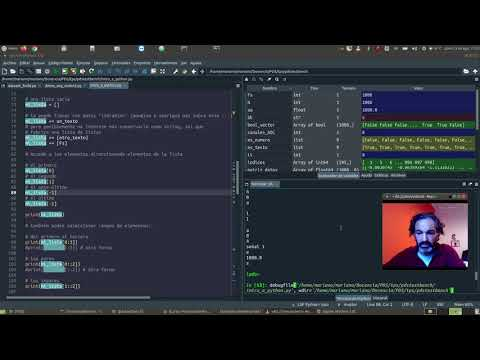

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('CJAZCYvigVc', width=800, height=450, list='PLlD2eDv5CIe9l0cjBJ1USQnC3gvV3n_Ga', index=1)


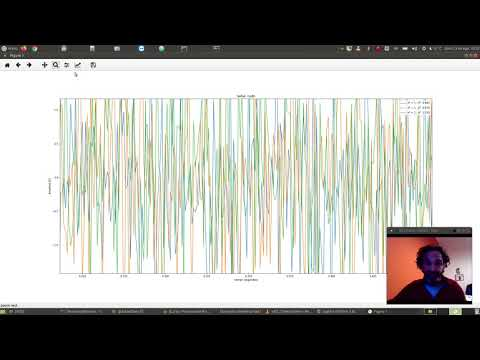

In [2]:
YouTubeVideo('yQ3KuMepMTM', width=800, height=450, list='PLlD2eDv5CIe9l0cjBJ1USQnC3gvV3n_Ga', index=2)


#### Paso 4: Jupyter Notebooks 
Este documento que estás leyendo fue creado con Jupyter Notebooks. Básicamente es un editor de texto que incorpora la *gran* ventaja de tener disponible en un mismo entorno de trabajo:

* Editor de texto con formato *Markdown*
* Posibilidad de incorporar lenguaje matemático via $ \LaTeX $
* Posibilidad de incluir código y (*re*) generación automática de gráficas y tablas.
* Posibilidad de insertar audios, videos de Youtube y otros contenidos multimedia.
* Visualización desde *CUALQUIER* dispositivo de forma fácil y elegante.

Seguramente en cuanto los comiences a usar, no podrás volver a usar otro formato para artículos técnicos. En el siguiente video podrás ver un tutorial para dar los primeros pasos:
   


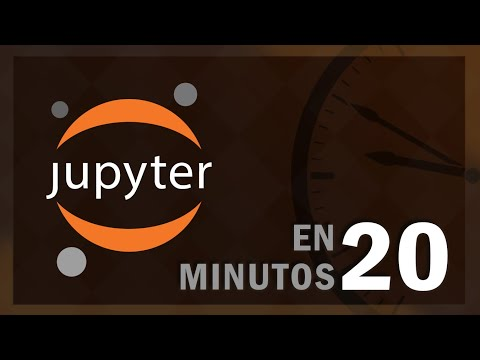

In [3]:
# en Castellano
YouTubeVideo('6Vr9ZUntCyE', width=800, height=450)


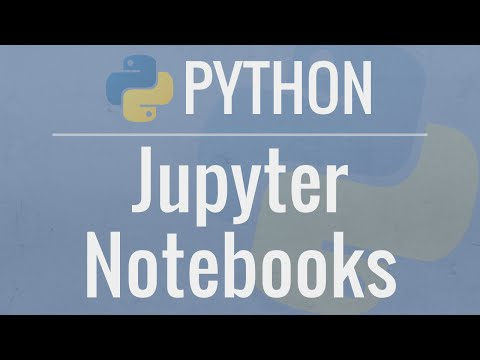

In [4]:
# o Inglés
YouTubeVideo('HW29067qVWk', width=800, height=450)


#### Paso 4: Ahora ustedes ... 
Tendrán que hacer su propio *Hola mundo* versión TC2.

1. Hacer una copia del **notebook0.ipynb** en *tu_carpeta_de_trabajo*.
2. Editá el notebook a tu antojo, podés practicar quitar, agregar o modificar celdas, etc. Luego, Hacé que las señales que se visualizan en las celdas de código, cambien algún parámetro cualquiera.
3. Agregá al final una celda de texto, ponele un título, y contame lo que hiciste.
4. Grabá, confirmá y subí los cambios a tu github.
5. **Proyectá** tu NB via nbviewer.org. 
    a. Copiá la URL de tu NB en tu repo de Github. La de este mismo doc se ve así:

    ```
    https://github.com/marianux/PDS/blob/main/preparacion.ipynb
    ```

    b. Luego pegala en la [página del proyector](https://nbviewer.jupyter.org/). Tocá el botón *Go!* o dale ENTER, y listo! La URL de la página a la que te lleva la podés usar para lo que gustes, intercambiar el NB, compartirlo con colegas y/o amigxs, hacer una entrega en el Campus, etc. Para que puedas ver la diferencia, la URL del mismo NB *proyectado* se ve así:
    
    ```
    https://nbviewer.jupyter.org/github/marianux/PDS/blob/main/preparacion.ipynb
    ```
    
6. Compartí la URL proyectada (la que empieza por *https://nbviewer.jupyter.org* ) en el [Chat de PDS](https://mail.google.com/chat/u/1/#chat/space/AAAAw_r33Cs). Si sos el/la primerx, no olvides los modales y abrí un nuevo tema de conversación 😉
    

